In [72]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [74]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [75]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/alexisbloor/Desktop/Homework/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [76]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [77]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [78]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [79]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [80]:
show = session.query(measurements).first()
show.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa7686d6ca0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
order = session.query(measurements.date).order_by(measurements.date.desc()).first()

last_date = dt.datetime.strptime(order[0], "%Y-%m-%d")
first_date = dt.datetime(last_date.year -1, last_date.month, last_date.day).date()
print(first_date)

2016-08-23


In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
precip_data = session.query(measurements.date, measurements.prcp).filter(measurements.date > first_date).all()
# Starting from the most recent data point in the database. 
precip_df = pd.DataFrame(precip_data, columns= ["Date", "Precipitation"])
precip_df.set_index("Date")
precip_df.head()


,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


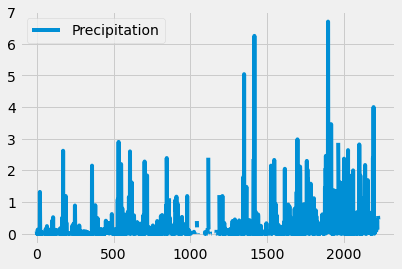

In [83]:
# Use Pandas Plotting with Matplotlib to plot the data
plot = precip_df.plot()
plt.show()

In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number stations in the dataset
first_station = session.query(stations).first()
first_station.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa768815c10>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [86]:
nbr_stations = session.query(measurements).group_by(measurements.station).count()
print(nbr_stations)

9


In [87]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
print(active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active[0][0]
temp_stats = session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).filter(measurements.station == most_active).all()

print(temp_stats)

[(54.0, 85.0, 71.66378066378067)]


In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
obsv_data = session.query(measurements.station, measurements.tobs).filter(measurements.station == most_active).filter(measurements.date >=first_date).all()

obsv_data_df = pd.DataFrame(obsv_data, columns= ["Stations", "tobs"])
obsv_data_df.set_index("Stations")
obsv_data_df.head()


,Stations,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


<AxesSubplot:ylabel='Frequency'>

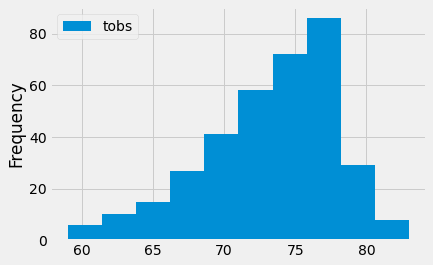

In [90]:
# Plot the results as a histogram

obsv_data_df.plot.hist()

# Close session

In [71]:
# Close Session
session.close()